In [1]:
import pandas as pd

# Load the data from the online repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)

print("Data loaded successfully.")
df.head()

Data loaded successfully.


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target (y)
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a scaler and scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data has been successfully split and scaled.")

Data has been successfully split and scaled.


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVM model
# random_state=42 ensures we get the same result every time
model = SVC(random_state=42)

# Train the model on our training data
model.fit(X_train_scaled, y_train)

print("Model training is complete.")

Model training is complete.


In [4]:
# Use the trained model to make predictions on the test set
predictions = model.predict(X_test_scaled)

# Calculate the accuracy by comparing predictions to the real answers
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy as a percentage
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 89.74%


In [5]:
from sklearn.model_selection import GridSearchCV

# Define the settings we want to test
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Create the Grid Search tool
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5)

# Find the best settings
grid.fit(X_train_scaled, y_train)

# Print the best settings found
print("Best Hyperparameters:", grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [6]:
# Use the best model found by the grid search to make predictions
grid_predictions = grid.predict(X_test_scaled)

# Calculate the new accuracy
new_accuracy = accuracy_score(y_test, grid_predictions)

# Print the new accuracy
print(f"Tuned Model Accuracy: {new_accuracy * 100:.2f}%")

Tuned Model Accuracy: 97.44%


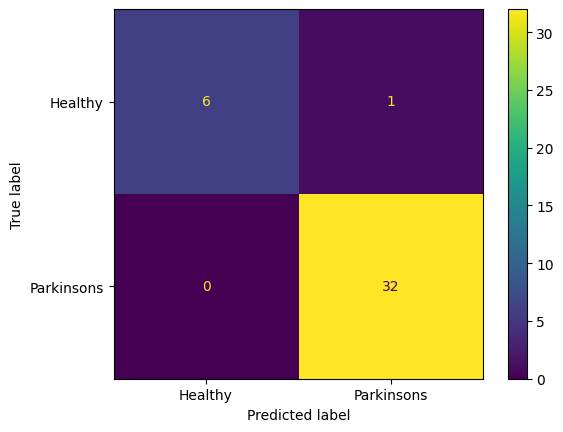

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, grid_predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Parkinsons'])

disp.plot()
plt.show()

In [8]:
import pickle

# Save the best model from Grid Search
with open('parkinsons_model.pkl', 'wb') as file:
    pickle.dump(grid, file)

# Save the scaler object
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Tuned model and scaler have been saved to your folder.")

Tuned model and scaler have been saved to your folder.
